In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from dython.nominal import associations

In [2]:
data = pd.read_excel('default of credit card clients.xls', index_col = 0)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      29670 non-null  object
 3   X4      29678 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  object
 21  X22     30001 non-null  object
 22  X23     30001 non-null  ob

In [4]:
data.isna().sum()

X1       0
X2       0
X3     331
X4     323
X5       0
X6       0
X7       0
X8       0
X9       0
X10      0
X11      0
X12      0
X13      0
X14      0
X15      0
X16      0
X17      0
X18      0
X19      0
X20      0
X21      0
X22      0
X23      0
Y        0
dtype: int64

In [5]:
data.nunique()

X1        82
X2         3
X3         6
X4         4
X5        64
X6        12
X7        12
X8        12
X9        12
X10       11
X11       11
X12    22724
X13    22347
X14    22027
X15    21549
X16    21011
X17    20605
X18     7944
X19     7900
X20     7519
X21     6938
X22     6898
X23     6940
Y          3
dtype: int64

In [6]:
data.loc["ID"]

X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_0
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
Name: ID, dtype: object

In [7]:
Categorical_data = data[['X' + str(i) for i in range(2,5)] + ['X' + str(i) for i in range(6,12)] + ['Y']]
Categorical_data.columns = Categorical_data.loc['ID']
Categorical_data.drop(index = 'ID', inplace = True)
Categorical_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ID,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
1,female,university,married,2,2,-1,-1,-2,-2,1
2,female,university,single,-1,2,0,0,0,2,1
3,female,university,single,0,0,0,0,0,0,0
4,female,university,married,0,0,0,0,0,0,0
5,male,university,married,-1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29996,male,high school,married,0,0,0,0,0,0,0
29997,male,high school,single,-1,-1,-1,-1,0,0,0
29998,male,university,single,4,3,2,-1,0,0,1
29999,male,high school,married,1,-1,0,0,0,-1,1


In [8]:
numerical_data = data[['X1','X5']+ ['X' + str(i) for i in range(12,24)]]
numerical_data.columns = numerical_data.loc['ID']
numerical_data.drop(index = 'ID', inplace = True)
numerical_data = numerical_data.astype(float)
numerical_data

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000.0,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000.0,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29999,80000.0,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [9]:
# Frequency tables for each categorical feature
for column in Categorical_data.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=Categorical_data[column], columns='% observations', normalize='columns')*100)

col_0,% observations
SEX,
female,50.0
male,50.0


col_0,% observations
EDUCATION,
0,20.0
graduate school,20.0
high school,20.0
others,20.0
university,20.0


col_0,% observations
MARRIAGE,
0,33.333333
married,33.333333
single,33.333333


col_0,% observations
PAY_0,
-2,9.090909
-1,9.090909
0,9.090909
1,9.090909
2,9.090909
3,9.090909
4,9.090909
5,9.090909
6,9.090909


col_0,% observations
PAY_2,
-2,9.090909
-1,9.090909
0,9.090909
1,9.090909
2,9.090909
3,9.090909
4,9.090909
5,9.090909
6,9.090909


col_0,% observations
PAY_3,
-2,9.090909
-1,9.090909
0,9.090909
1,9.090909
2,9.090909
3,9.090909
4,9.090909
5,9.090909
6,9.090909


col_0,% observations
PAY_4,
-2,9.090909
-1,9.090909
0,9.090909
1,9.090909
2,9.090909
3,9.090909
4,9.090909
5,9.090909
6,9.090909


col_0,% observations
PAY_5,
-2,10.0
-1,10.0
0,10.0
2,10.0
3,10.0
4,10.0
5,10.0
6,10.0
7,10.0


col_0,% observations
PAY_6,
-2,10.0
-1,10.0
0,10.0
2,10.0
3,10.0
4,10.0
5,10.0
6,10.0
7,10.0


col_0,% observations
default payment next month,
0,50.0
1,50.0


ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.518833,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.528019,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,267.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


ID,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
count,30000,29669,29677,30000,30000,30000,30000,30000,30000,30000
unique,2,5,3,11,11,11,11,10,10,2
top,female,university,single,0,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


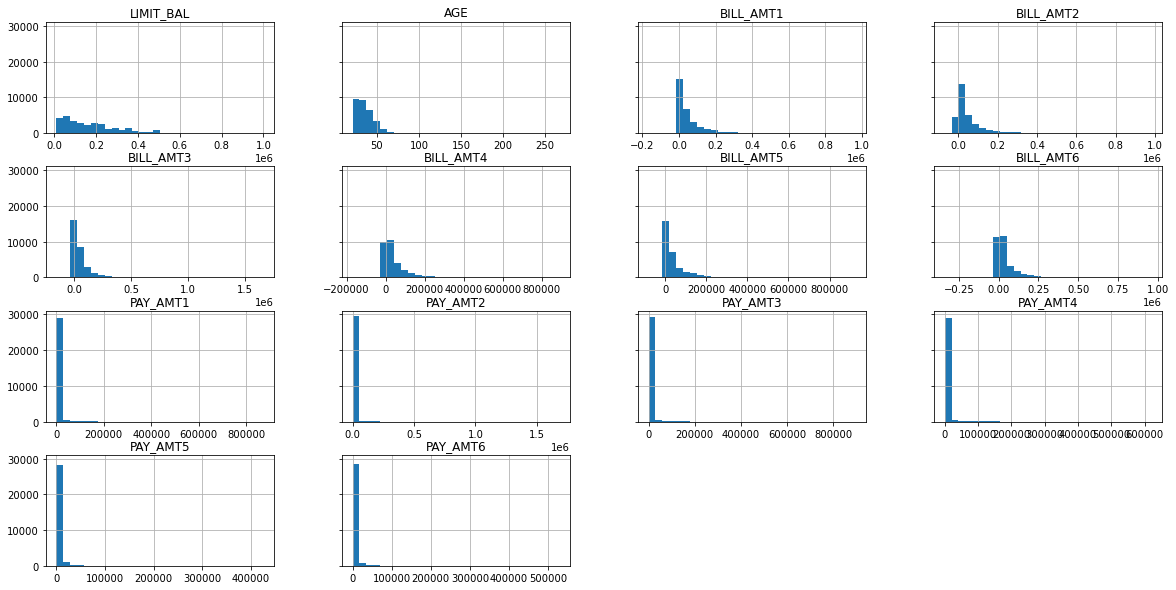

In [10]:
display(numerical_data.describe())
display(Categorical_data.describe(include=np.object))
#%matplotlib inline
hist = numerical_data.hist(bins=30, sharey=True, figsize=(20, 10))

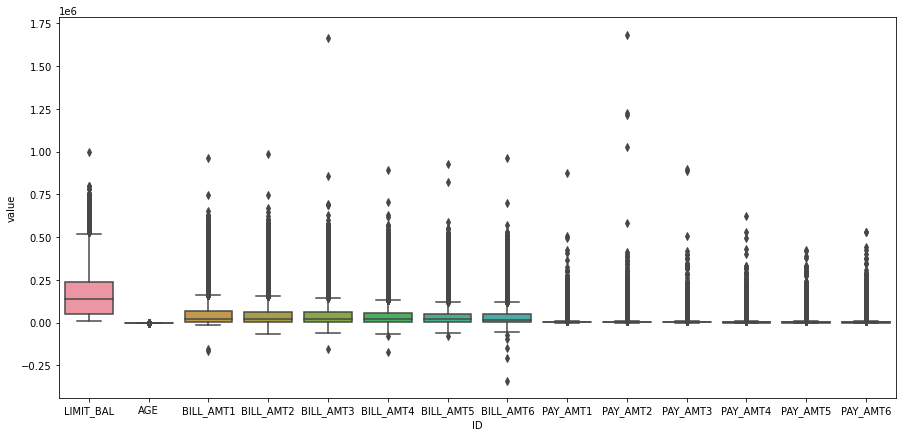

In [11]:
fig,ax1 = plt.subplots(figsize = (15,7))

sns.boxplot(ax = ax1 ,x="ID", y="value", data=pd.melt(numerical_data));

In [12]:
data2 = pd.concat([numerical_data,Categorical_data],axis = 1)
data2.rename(columns={"default payment next month": "Y"}, inplace = True)

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   AGE        30000 non-null  float64
 2   BILL_AMT1  30000 non-null  float64
 3   BILL_AMT2  30000 non-null  float64
 4   BILL_AMT3  30000 non-null  float64
 5   BILL_AMT4  30000 non-null  float64
 6   BILL_AMT5  30000 non-null  float64
 7   BILL_AMT6  30000 non-null  float64
 8   PAY_AMT1   30000 non-null  float64
 9   PAY_AMT2   30000 non-null  float64
 10  PAY_AMT3   30000 non-null  float64
 11  PAY_AMT4   30000 non-null  float64
 12  PAY_AMT5   30000 non-null  float64
 13  PAY_AMT6   30000 non-null  float64
 14  SEX        30000 non-null  object 
 15  EDUCATION  29669 non-null  object 
 16  MARRIAGE   29677 non-null  object 
 17  PAY_0      30000 non-null  object 
 18  PAY_2      30000 non-null  object 
 19  PAY_3      30000 non-null  object 
 20  PAY_4      

In [14]:
data2.isna().sum()

ID
LIMIT_BAL      0
AGE            0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
SEX            0
EDUCATION    331
MARRIAGE     323
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
Y              0
dtype: int64

In [27]:
data2.Y.sum() / len(data2.Y)

0.2212

In [15]:
data3 = data2.copy()
data3.dropna( inplace = True, axis = 0)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29351 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  29351 non-null  float64
 1   AGE        29351 non-null  float64
 2   BILL_AMT1  29351 non-null  float64
 3   BILL_AMT2  29351 non-null  float64
 4   BILL_AMT3  29351 non-null  float64
 5   BILL_AMT4  29351 non-null  float64
 6   BILL_AMT5  29351 non-null  float64
 7   BILL_AMT6  29351 non-null  float64
 8   PAY_AMT1   29351 non-null  float64
 9   PAY_AMT2   29351 non-null  float64
 10  PAY_AMT3   29351 non-null  float64
 11  PAY_AMT4   29351 non-null  float64
 12  PAY_AMT5   29351 non-null  float64
 13  PAY_AMT6   29351 non-null  float64
 14  SEX        29351 non-null  object 
 15  EDUCATION  29351 non-null  object 
 16  MARRIAGE   29351 non-null  object 
 17  PAY_0      29351 non-null  object 
 18  PAY_2      29351 non-null  object 
 19  PAY_3      29351 non-null  object 
 20  PAY_4      

In [16]:
data3.isna().sum()

ID
LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
SEX          0
EDUCATION    0
MARRIAGE     0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
Y            0
dtype: int64

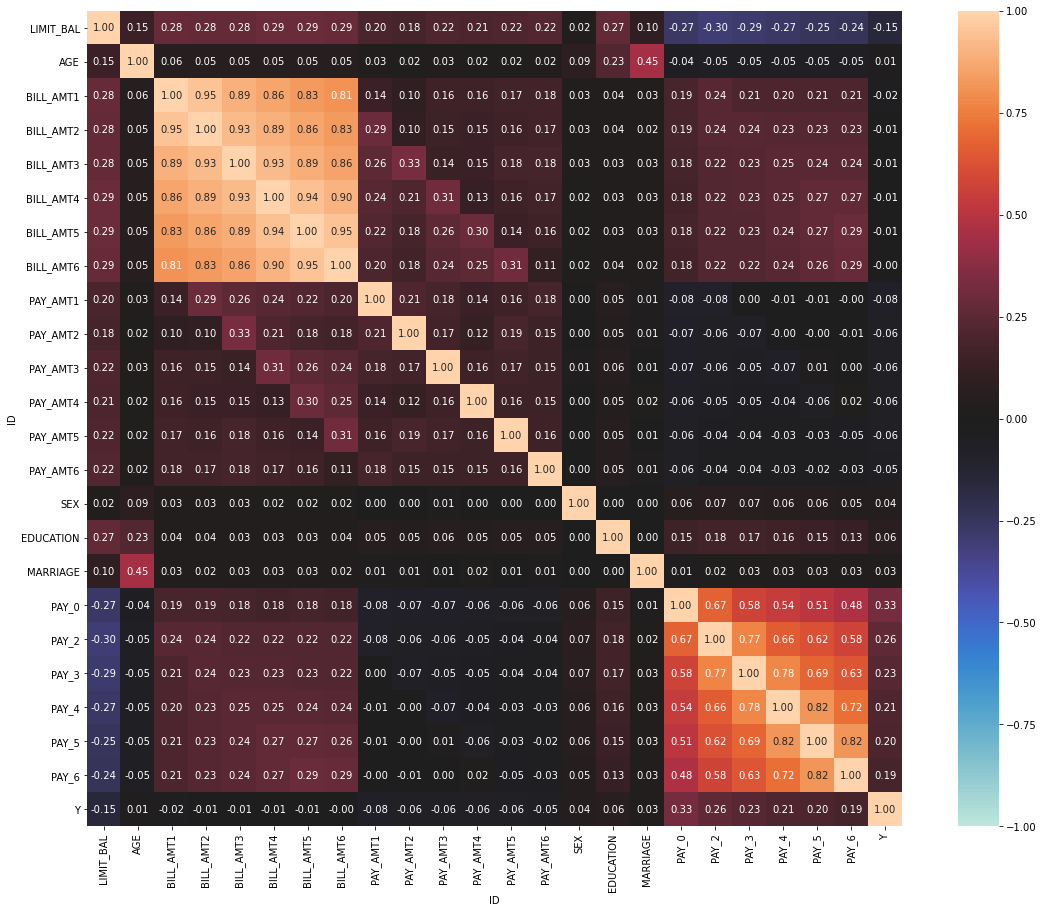

In [17]:
M = associations(data3,figsize = (20,15))

In [18]:
data3.PAY_4.unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)

In [19]:
data3.PAY_5.unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [20]:
data3.PAY_4.value_counts()

 0    16021
-1     5592
-2     4275
 2     3118
 3      176
 4       69
 7       56
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

In [21]:
data3.PAY_5.value_counts()

 0    16497
-1     5448
-2     4467
 2     2600
 3      177
 4       84
 7       56
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [22]:
def customer_hist(data2, customer_idx = 32):
    print('Index: {}, Default? {}'.format(customer_idx, data2.iloc[customer_idx]['Y']))
    y1 = data2.iloc[customer_idx][['BILL_AMT6','BILL_AMT5','BILL_AMT4', 'BILL_AMT3','BILL_AMT2','BILL_AMT1']]
    y2 = data2.iloc[customer_idx][['PAY_AMT6','PAY_AMT5','PAY_AMT4', 'PAY_AMT3','PAY_AMT2','PAY_AMT1']]
    x = ['April','May','June','July','August','Septemper']
    fig,ax = plt.subplots()
    ax.grid();
    ax.set_xlabel('Month');
    ax.set_ylabel('Amount (In thousands)');
    ax.plot(x,y1 * .001, x,y2 * .001);
    ax.legend(['Billed', 'Paid']);
    ax.set_title('Customer History (Billed Vs Paid) for customer idx = {}'.format(customer_idx))
    plt.show()

Index: 1084, Default? 1


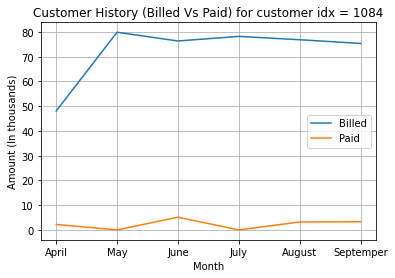

Index: 5102, Default? 1


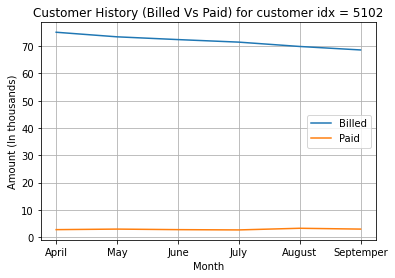

Index: 6272, Default? 1


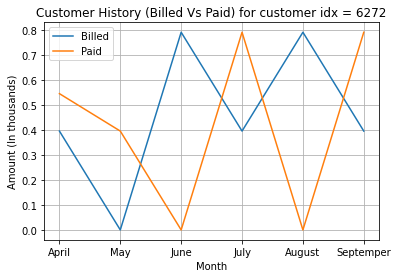

Index: 813, Default? 1


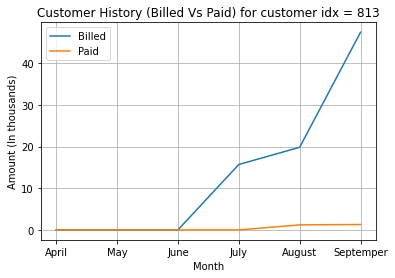

Index: 2761, Default? 1


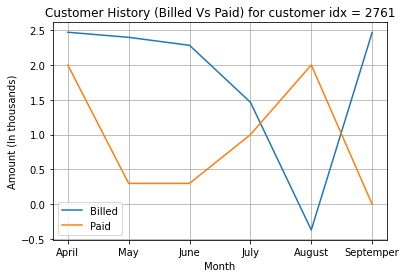

Index: 6477, Default? 1


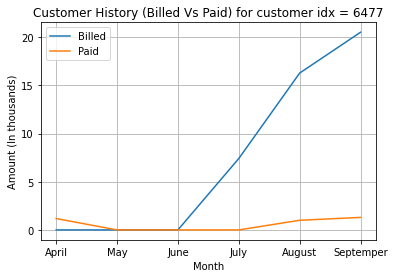

Index: 6490, Default? 1


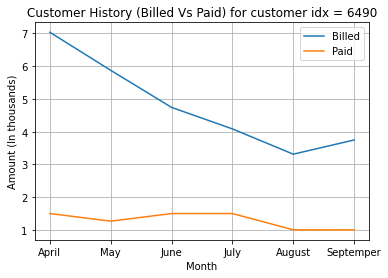

Index: 5754, Default? 1


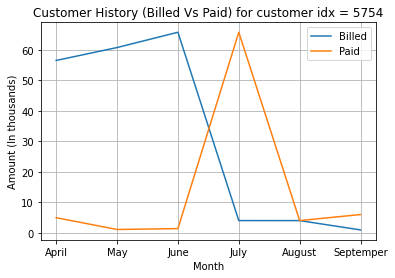

Index: 4481, Default? 1


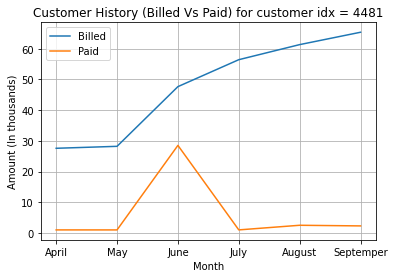

Index: 1602, Default? 1


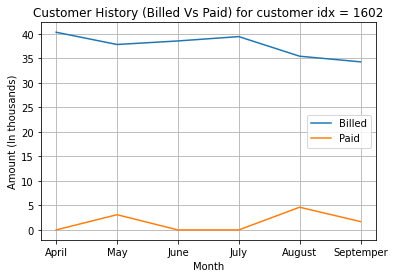

In [23]:
for i in range(10):
    idx = np.random.randint(low = 0, high = data3.query('Y == "1"').shape[0])
    customer_hist(data3.query('Y == "1"'), idx)

Index: 18812, Default? 0


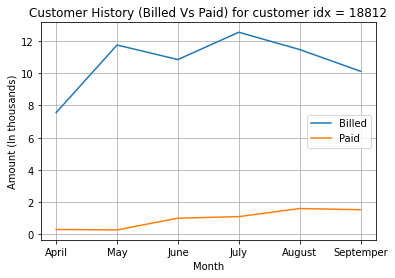

Index: 16126, Default? 0


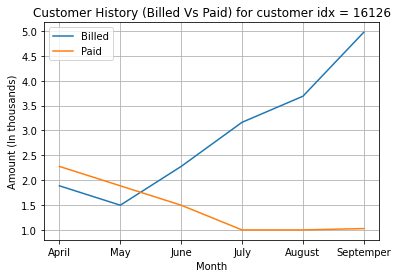

Index: 14709, Default? 0


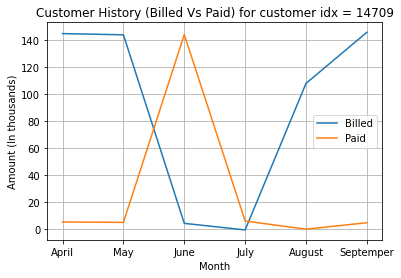

Index: 12158, Default? 0


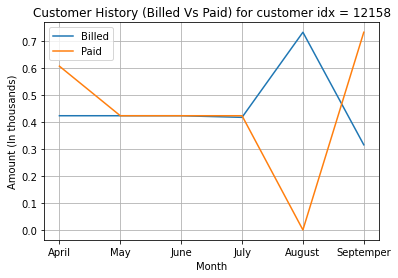

Index: 10424, Default? 0


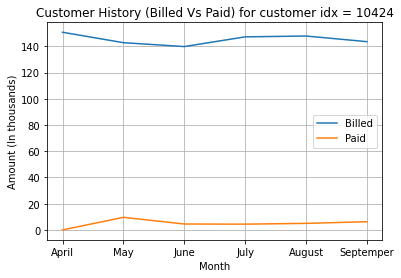

Index: 21390, Default? 0


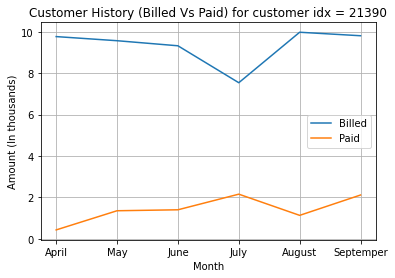

Index: 15814, Default? 0


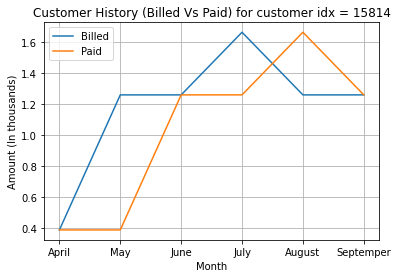

Index: 15988, Default? 0


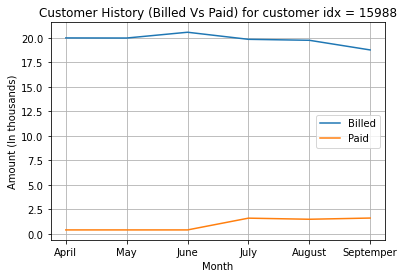

Index: 21187, Default? 0


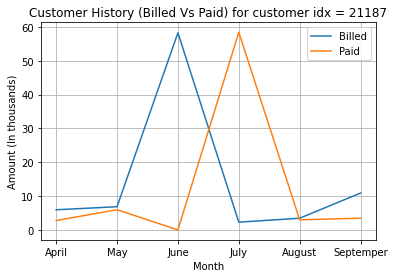

Index: 2936, Default? 0


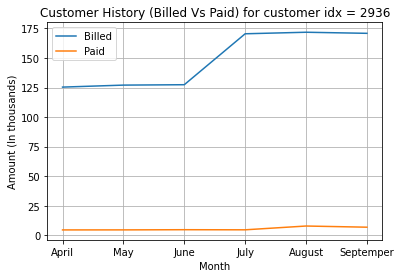

In [24]:
for i in range(10):
    idx = np.random.randint(low = 0, high = data3.query('Y == "0"').shape[0])
    customer_hist(data3.query('Y == "0"'), idx)

In [26]:
data3.to_csv('data_clean.csv', index = False)

## Data Insights

- Highly correlated delayed payment features indicating that there is a lot of chance that the person who delayed the payment once to continue off-track in later months. On other side, clients with regular payment habits tend to keep this routine. 
- Small fraction of the rows are missing their values for Education and marriage columns ( 331 out of 30,000 or 1.10%). Thus, no need for imputation since dropping the missing rows will not affect the data fed to the model. 
- Robust scaling is more robust for large standard deviations i.e., minimizes impact of large marginal outliers. 
